<a href="https://colab.research.google.com/github/nikitas25644/Blind-Machine-Operations/blob/main/ProblemStatement_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from google.colab.patches import cv2_imshow


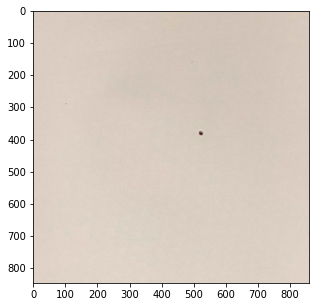

In [25]:
ppr1=cv.imread("/ppr1.jpg")
plt.figure(figsize=(5,5))
plt.imshow(ppr1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(847, 860, 3)
(847, 860, 3)


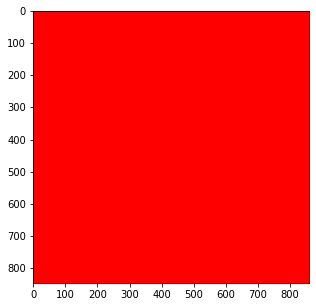

In [13]:
print(ppr1.shape)
ppr2=np.zeros([847,860,3])
ppr2[:,:,:1]=255.0
plt.figure(figsize=(5,5))
plt.imshow(ppr2)
print(ppr2.shape)

In [14]:
print(ppr1.dtype)
print(type(ppr1))
print(type(ppr2))

uint8
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
Ppr1=np.asarray(ppr1,np.float64)
Ppr2=np.asarray(ppr2,np.float64)
print(Ppr1.dtype)
print(Ppr2.dtype)

float64
float64


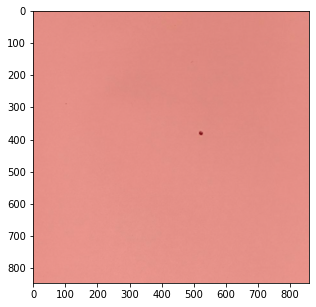

In [17]:
blendedimg= np.asarray(0.7*Ppr1+0.3*Ppr2,np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(blendedimg)

Connecting Webcam and aaplying overlay of images

In [18]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [20]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
      

<IPython.core.display.Javascript object>

Saved to photo.jpg


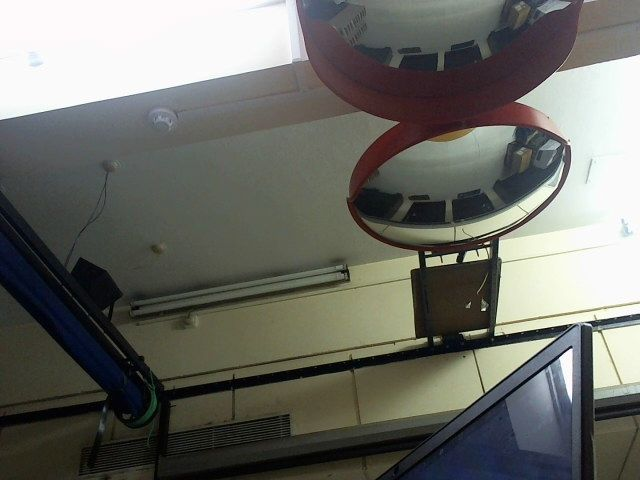

In [21]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))